In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib
from collections import Counter
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing

import sklearn.metrics as metrics
import math


from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.datasets import make_regression


In [4]:
df1=pd.read_csv('../data/1012au_pb_fd_im.csv')

In [5]:
df2=pd.read_csv('../data/13-15au_if.csv')

In [6]:
df1.head()

,author,2010pb,2011pb,2012pb,2010fund,2011fund,2012fund,2010im,2011im,2012im,2010pbf,2011pbf,2012pbf,2010fundf,2011fundf,2012fundf,2010imf,2011imf,2012imf
0,"Aamer, Khaled",1.0,0.0,0.0,0.0,0.0,0.0,7.883,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1,"Aanestad, Jon",1.0,0.0,0.0,1.0,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
2,"Aaritalo, Virpi",0.0,1.0,0.0,0.0,1.0,0.0,0.000,1.89,0.000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.89,0.000
3,"Aarne, Niko",0.0,0.0,1.0,0.0,0.0,1.0,0.000,0.00,3.909,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,3.909
4,"Aass, Anne Merete",0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.00,2.398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000


In [7]:
df1.shape

(28216, 19)

In [8]:
df2.head()

,author,2013if,2014if,2015if,sum
0,"'t Hart, M. C.",NaN,NaN,4.560,4.560
1,"Aachmann, Finn L.",NaN,NaN,5.583,5.583
2,"Aachmann, Finn Lillelund",NaN,5.75,3.263,9.013
3,"Aalten, Pauline",NaN,2.04,NaN,2.040
4,"Aalto-Setala, Katriina",0.0,NaN,NaN,0.000


In [9]:
df2.shape

(39960, 5)

In [10]:
df2 = df2[['author','sum']]

In [11]:
df2.columns=['author','target']

In [12]:
df3 = pd.read_csv('../data/1012nodes.csv')

In [13]:
df3.head(10)

,author,degree,indegree,outdegree,between,close,eigen
0,"Costa, Eunice",0.000177,0.000000,0.000177,0.0,0.000000,2.245117e-15
1,"de-Carvalho, Jorge",0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
2,"Casimiro, Teresa",0.000071,0.000071,0.000000,0.0,0.000071,8.755958e-14
3,"da Silva, Claudia Lobato",0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
4,"Cidade, Maria Teresa",0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
5,"Aguiar-Ricardo, Ana",0.000071,0.000071,0.000000,0.0,0.000071,8.755958e-14
6,"Carson, William C.",0.000177,0.000000,0.000177,0.0,0.000000,2.245117e-15
7,"Gerling, Gregory J.",0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
8,"Krupski, Tracey L.",0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
9,"Kowalik, Casey G.",0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14


In [14]:
df3.shape

(28216, 7)

In [15]:
dfm = pd.merge(df1, df2, on='author')

In [16]:
dfm.shape

(7053, 20)

In [17]:
dfm.head()

,author,2010pb,2011pb,2012pb,2010fund,2011fund,2012fund,2010im,2011im,2012im,2010pbf,2011pbf,2012pbf,2010fundf,2011fundf,2012fundf,2010imf,2011imf,2012imf,target
0,"Abatangelo, Giovanni",1.0,0.0,0.0,0.0,0.0,0.0,6.202,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.458
1,"Abbasi, Azhar Z.",0.0,1.0,0.0,0.0,1.0,0.0,0.000,4.596,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,8.387
2,"Abdal-hay, Abdalla",0.0,0.0,2.0,0.0,0.0,2.0,0.000,0.000,3.772,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.772,12.442
3,"Abdollahi, Mohammad",0.0,0.0,2.0,0.0,0.0,1.0,0.000,0.000,2.597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.638
4,"Abe, Koji",0.0,0.0,2.0,0.0,0.0,2.0,0.000,0.000,5.054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.640


In [18]:
df = pd.merge(dfm,df3,on='author')

In [19]:
df.head()

,author,2010pb,2011pb,2012pb,2010fund,2011fund,2012fund,2010im,2011im,2012im,...,2010imf,2011imf,2012imf,target,degree,indegree,outdegree,between,close,eigen
0,"Abatangelo, Giovanni",1.0,0.0,0.0,0.0,0.0,0.0,6.202,0.000,0.000,...,0.0,0.0,0.000,1.458,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
1,"Abbasi, Azhar Z.",0.0,1.0,0.0,0.0,1.0,0.0,0.000,4.596,0.000,...,0.0,0.0,0.000,8.387,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
2,"Abdal-hay, Abdalla",0.0,0.0,2.0,0.0,0.0,2.0,0.000,0.000,3.772,...,0.0,0.0,3.772,12.442,0.000106,0.000000,0.000106,0.0,0.000000,2.245117e-15
3,"Abdollahi, Mohammad",0.0,0.0,2.0,0.0,0.0,1.0,0.000,0.000,2.597,...,0.0,0.0,0.000,1.638,0.000071,0.000071,0.000000,0.0,0.000071,8.755958e-14
4,"Abe, Koji",0.0,0.0,2.0,0.0,0.0,2.0,0.000,0.000,5.054,...,0.0,0.0,0.000,1.640,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14


In [20]:
df.columns

Index(['author', '2010pb', '2011pb', '2012pb', '2010fund', '2011fund',
       '2012fund', '2010im', '2011im', '2012im', '2010pbf', '2011pbf',
       '2012pbf', '2010fundf', '2011fundf', '2012fundf', '2010imf', '2011imf',
       '2012imf', 'target', 'degree', 'indegree', 'outdegree', 'between',
       'close', 'eigen'],
      dtype='object')

In [100]:
#df.to_csv('../data/model.csv',index=False)

In [21]:
df['pbsum']=df[['2010pb','2011pb','2012pb']].sum(axis=1)
df['fundsum']=df[['2010fund','2011fund','2012fund']].sum(axis=1)
df['imsum']=df[['2010im','2011im','2012im']].sum(axis=1)
df['pbfsum']=df[['2010pbf','2011pbf','2012pbf']].sum(axis=1)
df['fundfsum']=df[['2010fundf','2011fundf','2012fundf']].sum(axis=1)
df['imfsum']=df[['2010imf','2011imf','2012imf']].sum(axis=1)

In [22]:
df['pbdif']=df['2012pb']-df['2011pb']
df['funddif']=df['2012fund']-df['2011fund']
df['imdif']=df['2012im']-df['2011im']
df['pbfdif']=df['2012pbf']-df['2011pbf']
df['fundfdif']=df['2012fundf']-df['2011fundf']
df['imfdif']=df['2012imf']-df['2011imf']

In [24]:
df[df['author']=='Abatangelo, Giovanni']

,author,2010pb,2011pb,2012pb,2010fund,2011fund,2012fund,2010im,2011im,2012im,...,imsum,pbfsum,fundfsum,imfsum,pbdif,funddif,imdif,pbfdif,fundfdif,imfdif
0,"Abatangelo, Giovanni",1.0,0.0,0.0,0.0,0.0,0.0,6.202,0.0,0.0,...,6.202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.columns

Index(['author', '2010pb', '2011pb', '2012pb', '2010fund', '2011fund',
       '2012fund', '2010im', '2011im', '2012im', '2010pbf', '2011pbf',
       '2012pbf', '2010fundf', '2011fundf', '2012fundf', '2010imf', '2011imf',
       '2012imf', 'target', 'degree', 'indegree', 'outdegree', 'between',
       'close', 'eigen', 'pbsum', 'fundsum', 'imsum', 'pbfsum', 'fundfsum',
       'imfsum', 'pbdif', 'funddif', 'imdif', 'pbfdif', 'fundfdif', 'imfdif'],
      dtype='object')

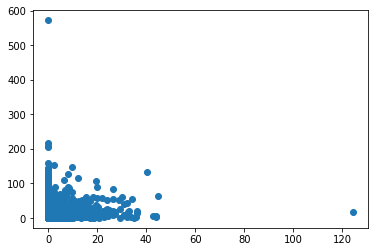

In [26]:
fig,ax=plt.subplots()
ax.scatter(x=df['imfsum'],y=df['target'])

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")



 mu = 9.24 and sigma = 15.08



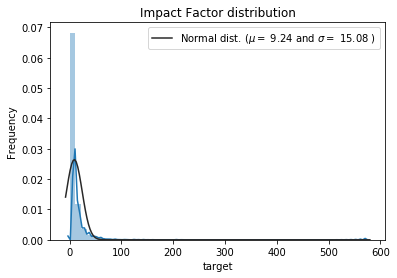

In [28]:
from scipy.stats import norm, skew
sns.distplot(df['target'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['target'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best');
plt.ylabel('Frequency');
plt.title('Impact Factor distribution');

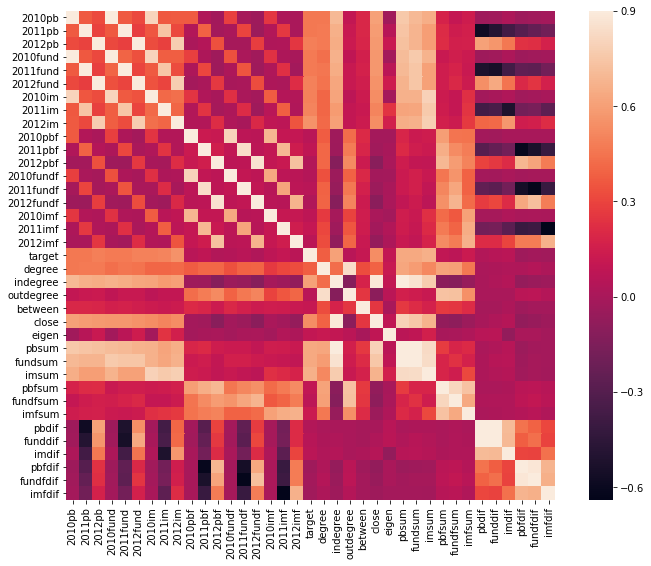

In [29]:
corr = df.corr()
plt.subplots(figsize=(12,9));
sns.heatmap(corr, vmax=0.9, square=True);

In [30]:
corr.sort_values(["target"], ascending = False, inplace = True)
print(corr.target)

target       1.000000
imsum        0.661922
fundsum      0.637975
pbsum        0.635542
indegree     0.605892
2012im       0.552281
close        0.536770
2011im       0.505246
2010im       0.496804
2012fund     0.493768
2012pb       0.490062
2011fund     0.471024
2010fund     0.470967
2010pb       0.465639
2011pb       0.461046
degree       0.380942
imfsum       0.126765
between      0.110815
2011imf      0.101392
eigen        0.096168
pbfsum       0.092233
2011pbf      0.082190
2010imf      0.078804
fundfsum     0.073141
2012imf      0.064825
imdif        0.064382
2011fundf    0.061966
2010pbf      0.059821
outdegree    0.059273
funddif      0.052959
2010fundf    0.044320
2012pbf      0.039669
pbdif        0.037448
2012fundf    0.033123
fundfdif    -0.017132
imfdif      -0.025915
pbfdif      -0.028730
Name: target, dtype: float64


In [36]:
pd.DataFrame(corr.target).sort_values('target',ascending=True).head(11)


,target
pbfdif,-0.028730
imfdif,-0.025915
fundfdif,-0.017132
2012fundf,0.033123
pbdif,0.037448
2012pbf,0.039669
2010fundf,0.044320
funddif,0.052959
outdegree,0.059273
2010pbf,0.059821


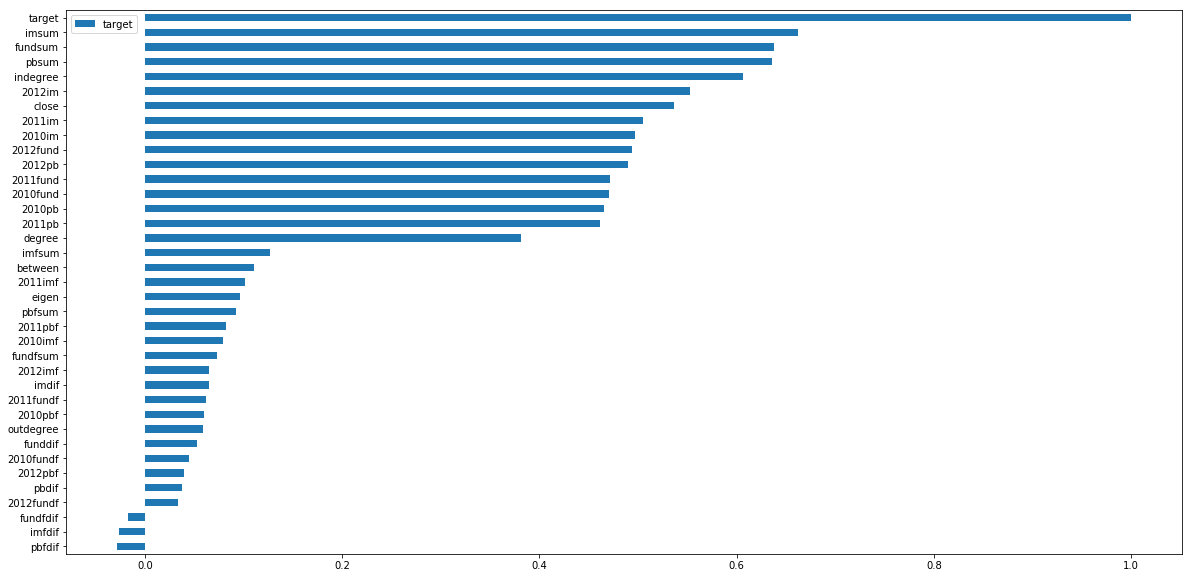

In [38]:
pd.DataFrame(corr.target).sort_values('target',ascending=True).plot(kind="barh", figsize=(20,10))

In [92]:
#np.setdiff1d(df1['author'].unique(), df3['author'].unique())

array([' Aamer, Khaled', ' Aanestad, Jon', ' Aass, Anne Merete', ...,
       ' von Trotha, Klaus T.', ' von Versen, Ruediger',
       ' von Wilmowsky, Cornelius'], dtype=object)

In [39]:
y = df['target']
x = df.drop(['author','target'],axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [41]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 11.291505721484572
RMSE on Test set : 10.439429065812707


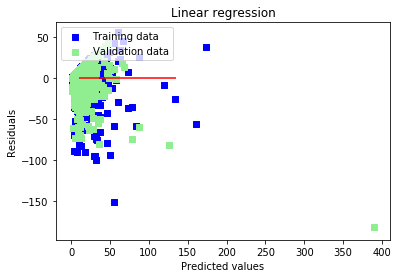

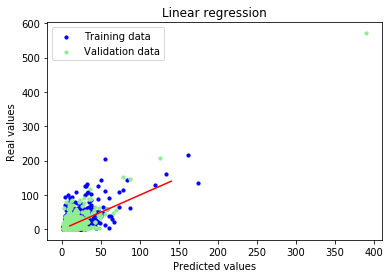

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression");
plt.xlabel("Predicted values");
plt.ylabel("Residuals");
plt.legend(loc = "upper left");
plt.hlines(y = 0, xmin = 10.5, xmax = 135, color = "red");
plt.show();

# Plot predictions
plt.scatter(y_train_pred, y_train, s=10,c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test_pred, y_test,s=10, c = "lightgreen", marker = "o", label = "Validation data")
plt.title("Linear regression");
plt.xlabel("Predicted values");
plt.ylabel("Real values");
plt.legend(loc = "upper left");
plt.plot([10, 140], [10, 140], c = "red");
plt.show();

Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 84.0
Ridge RMSE on Training set : 11.268868594118496
Ridge RMSE on Test set : 10.305917266320467


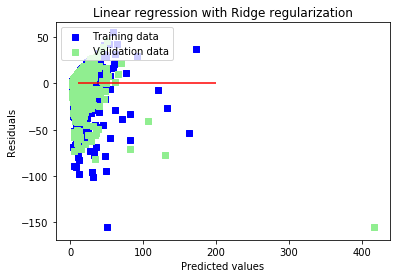

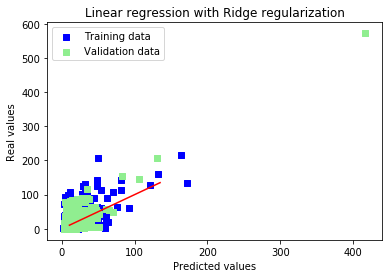

Ridge picked 36 features and eliminated the other 0 features


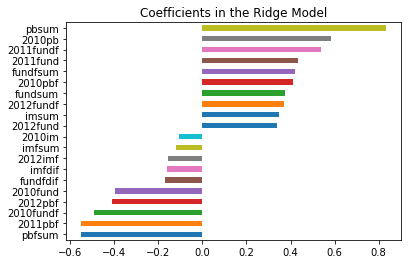

In [44]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization");
plt.xlabel("Predicted values");
plt.ylabel("Residuals");
plt.legend(loc = "upper left");
plt.hlines(y = 0, xmin = 10.5, xmax = 200, color = "red");
plt.show();

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization");
plt.xlabel("Predicted values");
plt.ylabel("Real values");
plt.legend(loc = "upper left");
plt.plot([10.5, 135], [10.5, 135], c = "red");
plt.show();

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh");
plt.title("Coefficients in the Ridge Model");
plt.show();

In [45]:
imp_coefs

pbfsum      -0.550501
2011pbf     -0.549134
2010fundf   -0.491015
2012pbf     -0.412583
2010fund    -0.398770
fundfdif    -0.171740
imfdif      -0.159391
2012imf     -0.157864
imfsum      -0.118237
2010im      -0.106835
2012fund     0.339628
imsum        0.347504
2012fundf    0.368716
fundsum      0.375089
2010pbf      0.411215
fundfsum     0.418158
2011fund     0.434231
2011fundf    0.540457
2010pb       0.582350
pbsum        0.831382
dtype: float64

Best alpha : 0.3
Try again for more precision with alphas centered around 0.3
Best alpha : 0.18
Lasso RMSE on Training set : 11.233719680077602
Lasso RMSE on Test set : 10.293725808863224


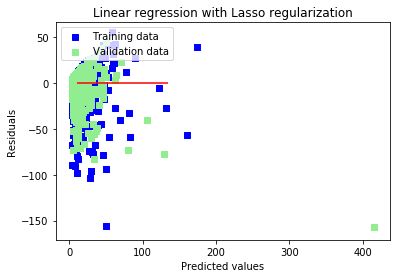

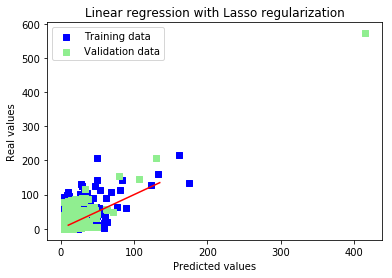

Lasso picked 9 features and eliminated the other 27 features


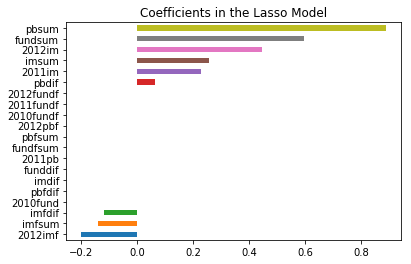

In [47]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values");
plt.ylabel("Residuals");
plt.legend(loc = "upper left");
plt.hlines(y = 0, xmin = 10.5, xmax = 135, color = "red");
plt.show();

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization");
plt.xlabel("Predicted values");
plt.ylabel("Real values");
plt.legend(loc = "upper left");
plt.plot([10.5, 135], [10.5, 135], c = "red");
plt.show();

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh");
plt.title("Coefficients in the Lasso Model");
plt.show();

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best l1_ratio : 0.3
Best alpha : 0.6
Try again for more precision with l1_ratio centered around 0.3
Best l1_ratio : 0.3
Best alpha : 0.6
Now try again for more precision on alpha, with l1_ratio fixed at 0.3 and alpha centered around 0.6
Best l1_ratio : 0.3
Best alpha : 0.6
ElasticNet RMSE on Training set : 11.227430638548023
ElasticNet RMSE on Test set : 10.286686180824223


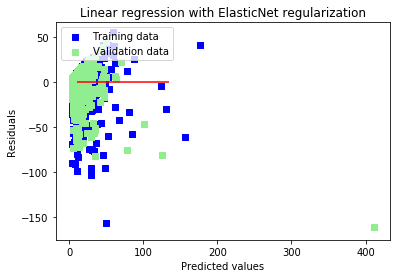

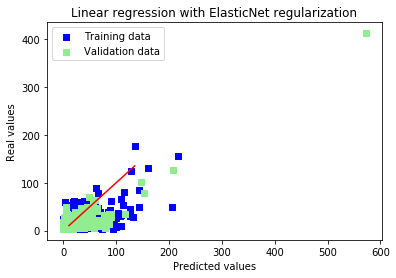

ElasticNet picked 11 features and eliminated the other 25 features


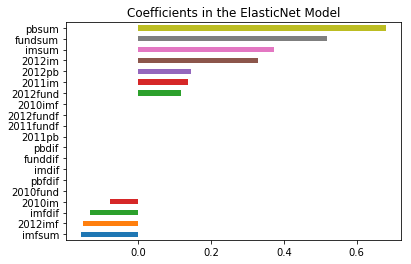

In [49]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization");
plt.xlabel("Predicted values");
plt.ylabel("Residuals");
plt.legend(loc = "upper left");
plt.hlines(y = 0, xmin = 10.5, xmax = 135, color = "red");
plt.show();

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization");
plt.xlabel("Predicted values");
plt.ylabel("Real values");
plt.legend(loc = "upper left");
plt.plot([10.5, 135], [10.5, 135], c = "red");
plt.show();

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh");
plt.title("Coefficients in the ElasticNet Model");
plt.show();

In [50]:
y_te_pred = elasticNet.predict(x)

In [51]:
prediction = pd.DataFrame(y_te_pred, columns=['target'])
result = pd.concat([df['author'], prediction], axis=1)

In [52]:
result.sort_values(by='target', ascending=False)

,author,target
2630,"Kaplan, David L.",411.286410
3026,"Langer, Robert",176.465200
3691,"Mano, Joao F.",156.463500
2692,"Khademhosseini, Ali",130.569620
4752,"Reis, Rui L.",126.070019
153,"Anderson, Daniel G.",123.594609
3160,"Lendlein, Andreas",100.866970
2466,"Jansen, John A.",88.213052
4283,"Omenetto, Fiorenzo G.",84.731567
5471,"Stupp, Samuel I.",80.975925


In [53]:
df[['author','target']].sort_values(by='target',ascending=False).head(10)

,author,target
2630,"Kaplan, David L.",571.996
3691,"Mano, Joao F.",217.383
4752,"Reis, Rui L.",207.305
3980,"Mooney, David J.",205.787
2692,"Khademhosseini, Ali",159.656
977,"Chu, Paul K.",153.251
3160,"Lendlein, Andreas",146.743
611,"Burdick, Jason A.",143.670
4283,"Omenetto, Fiorenzo G.",142.305
3026,"Langer, Robert",135.356


In [55]:
rf = RandomForestRegressor(n_estimators=20, random_state=0)  
rf.fit(X_train, y_train)  
#y_pred = regressor.predict(X_test)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

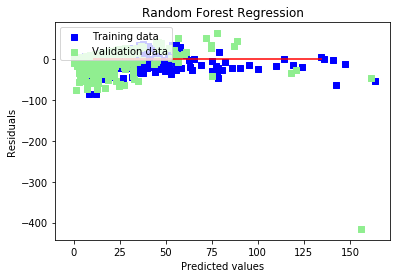

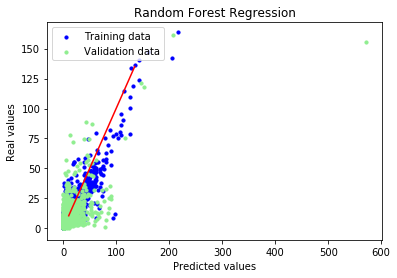

In [56]:
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

# Plot residuals
plt.scatter(y_train_rf, y_train_rf - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rf, y_test_rf - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Random Forest Regression");
plt.xlabel("Predicted values");
plt.ylabel("Residuals");
plt.legend(loc = "upper left");
plt.hlines(y = 0, xmin = 10.5, xmax = 135, color = "red");
plt.show();

# Plot predictions
plt.scatter(y_train, y_train_rf,s=10, c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test, y_test_rf,s=10, c = "lightgreen", marker = "o", label = "Validation data")
plt.title("Random Forest Regression");
plt.xlabel("Predicted values");
plt.ylabel("Real values");
plt.legend(loc = "upper left");
plt.plot([10.5, 135], [10.5, 135], c = "red");
plt.show();

In [57]:
print("ElasticNet RMSE on Training set :", rmse_cv_train(rf).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(rf).mean())

ElasticNet RMSE on Training set : 11.930019737059084
ElasticNet RMSE on Test set : 12.935914821371972


In [58]:
y_te_pred_rf = rf.predict(x)
prediction_rf = pd.DataFrame(y_te_pred_rf, columns=['target'])
result_rf = pd.concat([df['author'], prediction_rf], axis=1).sort_values(by='target',ascending=False)

In [59]:
result_rf.head(10)

,author,target
3691,"Mano, Joao F.",163.64930
4752,"Reis, Rui L.",161.30215
2630,"Kaplan, David L.",155.91785
2692,"Khademhosseini, Ali",147.54445
3980,"Mooney, David J.",142.50565
4283,"Omenetto, Fiorenzo G.",140.69760
3026,"Langer, Robert",135.96275
153,"Anderson, Daniel G.",134.14440
611,"Burdick, Jason A.",124.03080
3160,"Lendlein, Andreas",120.92630


In [60]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=True)

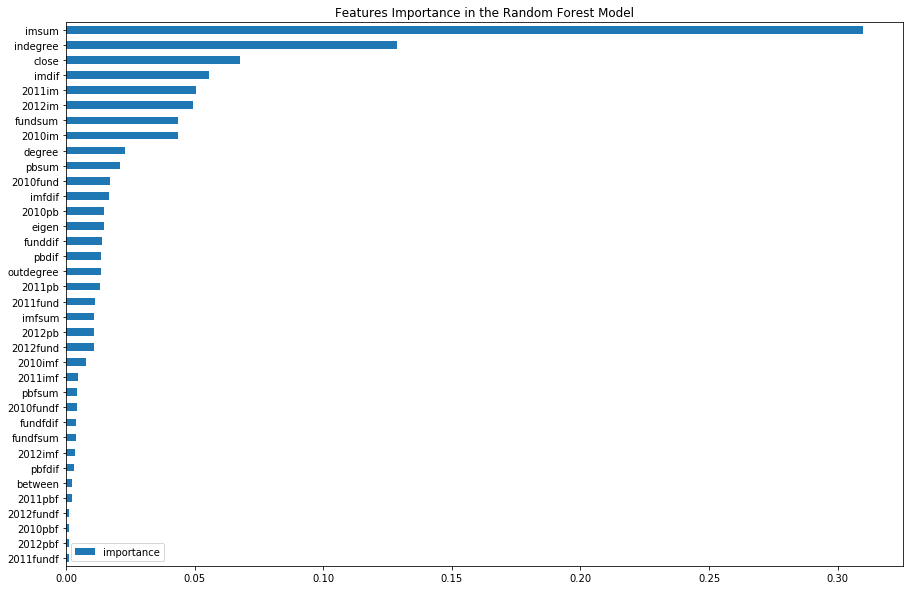

In [61]:
plt.rcParams["figure.figsize"] = (15,10)
feature_importances.plot(kind = "barh");

plt.title("Features Importance in the Random Forest Model");

plt.show();

In [62]:
errordf=pd.DataFrame(columns=['train','test'])

In [63]:
for i in [lr, ridge, lasso, elasticNet, rf]:
    errordf = errordf.append(pd.DataFrame([[rmse_cv_train(i).mean(),rmse_cv_test(i).mean()]],index=['i'],columns=errordf.columns))
    

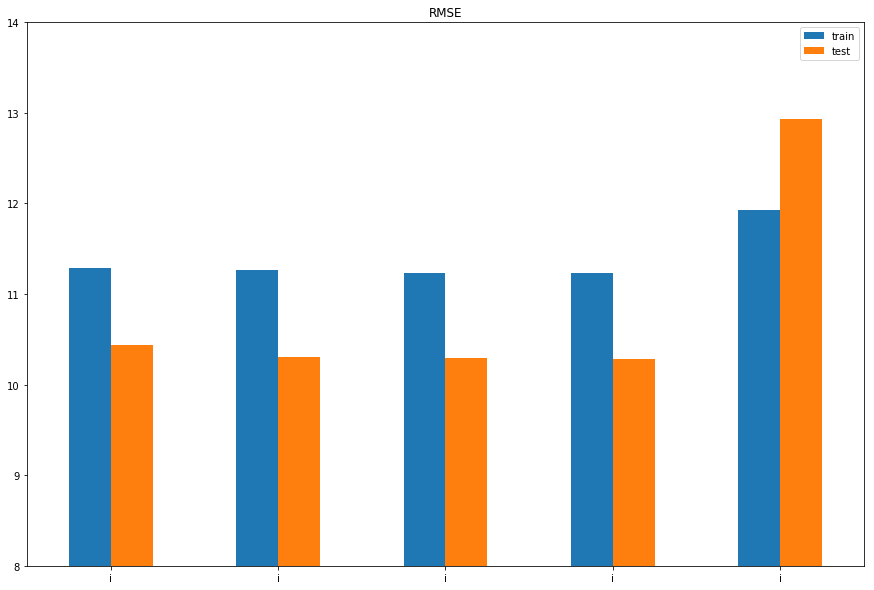

In [65]:

errordf.plot.bar(rot=0);
plt.ylim(8,14);
plt.title("RMSE");